In [ ]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
#from SocialNetwork.cascade import *
from Advertising.learners.greedyLearner import *
from Advertising.learners.UCB_no_anything import *
from Advertising.learners.UCB_no_qualities import *
seed = 6789 
random.seed(seed)
deltas=[0.5,0.42,0.38,0.30,0.2,0.05]
social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')
adversary_bids = []
for _ in range(0, 10): 
    adversary_i_bids = []
    for _ in range(0, 5):
        adversary_i_bids.append(random.randint(0, 4))
    adversary_bids.append(adversary_i_bids)
array_estimation = compute_array_estimated_influence(social_network, 2000)


In [ ]:
arms = arms_creation(number_of_arms=20, seed=30291)
expected_values = []
vcg = VCG()
for i in range(0, len(arms)):
    expected_i=0
    bids = []
    bids.append(arms[i])
    for element in adversary_bids:
        bids.append(element)
    bids = setup(bids, 5)
    ad_allocation_list=vcg.all_best_allocations(bids, social_network)
    if i == 14:
        print(ad_allocation_list)
    payments = vcg.payments(bids, ad_allocation_list, social_network)


    for _ in range(3000):
        gain, active_by_click = activate_cascade(social_network, ad_allocation_list, 1, deltas)
        payments_tot = calculate_total_payment(payments, social_network.categories, active_by_click)
        reward = gain-payments_tot
        expected_i+=reward
        reset_nodes(social_network)
    
    expected_i = expected_i/3000
    expected_values.append(expected_i)


[[(bid=4, id=6), (bid=3, id=3), (bid=3, id=5), (bid=3, id=9), (bid=3, id=10), (bid=2, id=1)], [(bid=4, id=2), (bid=4, id=6), (bid=4, id=11), (bid=3, id=1), (bid=3, id=3), (bid=2, id=7)], [(bid=3, id=3), (bid=2, id=1), (bid=2, id=4), (bid=2, id=8), (bid=1, id=2), (bid=1, id=7)], [(bid=4, id=5), (bid=4, id=9), (bid=3, id=4), (bid=3, id=10), (bid=2, id=6), (bid=2, id=7)], [(bid=4, id=4), (bid=4, id=5), (bid=3, id=2), (bid=2, id=6), (bid=2, id=7), (bid=1, id=1)]]


In [ ]:
print("Here are the maximum expected value and the arm that provides it, computed with the above \"Greedy\" approach")
print(max(expected_values))
print(arms[np.argmax(expected_values)])

Here are the maximum expected value and the arm that provides it, computed with the above "Greedy" approach
2.2299857142857116
[2, 3, 2, 1, 1]


In [4]:
rounds=10000
repetitions=4

In [5]:
print("Here are some outputs for the case without ad qualities, with only ads in first position")
for i in range(0, repetitions):
    best_arm_no_qualities, expected_values_no_qualities, number_of_pulls_no_qualities, index_no_qualities, bounds_no_qualities, plotting_no_qualities = ucb_no_qualities(arms, rounds, adversary_bids, array_estimation, social_network, deltas, 1, True)
    print(best_arm_no_qualities)
    print(expected_values_no_qualities[index_no_qualities])


Here are some outputs for the case without ad qualities, with only ads in first position
[3, 3, 4, 2, 3]
1.8418592205950635
[3, 3, 4, 2, 3]
1.8108656962859244
[3, 3, 4, 2, 3]
1.8275829374887609
[3, 3, 4, 2, 3]
1.8919504105187743


In [6]:
print("Here are some outputs for the case without ad qualities, with all ads")
for i in range(0, repetitions):
    best_arm_no_qualities2, expected_values_no_qualities2, number_of_pulls_no_qualities2, index_no_qualities2, bounds_no_qualities2, plotting_no_qualities2 = ucb_no_qualities(arms, rounds, adversary_bids, array_estimation, social_network, deltas, 1)
    print(best_arm_no_qualities2)
    print(expected_values_no_qualities2[index_no_qualities2])


Here are some outputs for the case without ad qualities, with all ads
[2, 3, 2, 1, 1]
1.742482528980222
[2, 3, 2, 1, 1]
1.7793081105114625
[2, 3, 2, 1, 1]
1.750992480698442
[2, 3, 2, 1, 1]
1.7656552156624836


In [7]:
print("Here are some outputs for the case without anything, with only ads in first position")
for i in range(0, repetitions):
    best_arm, expected_values, number_of_pulls, index, bounds, plotting = ucb(arms, rounds, adversary_bids, social_network, deltas, 1, True)
    print(best_arm)
    print(expected_values[index])


Here are some outputs for the case without anything, with only ads in first position
[3, 3, 4, 2, 3]
1.6842306820756627
[3, 3, 4, 2, 3]
1.6450698466780302
[3, 3, 4, 2, 3]
1.7057872696817522
[3, 3, 4, 2, 3]
1.7423187085015477


In [8]:
print("Here are some outputs for the case without anything, with all ads")
for j in range(0, repetitions):
    best_arm2, expected_values2, number_of_pulls2, index2, bounds2, plotting2 = ucb(arms, rounds, adversary_bids, social_network, deltas, 1)
    print(best_arm2)
    print(expected_values2[index2])


Here are some outputs for the case without anything, with all ads
[2, 3, 2, 1, 1]
2.131207761252633
[2, 3, 2, 1, 1]
2.1942050234222115
[2, 3, 2, 1, 1]
2.1467559192754186
[2, 3, 2, 1, 1]
2.1078623963376133


Here are reward and regret for the case without ad qualities, with only ads in first position
1


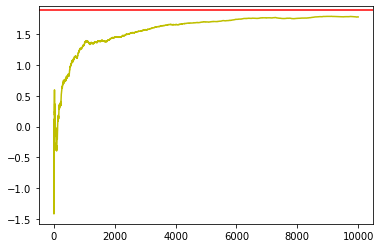

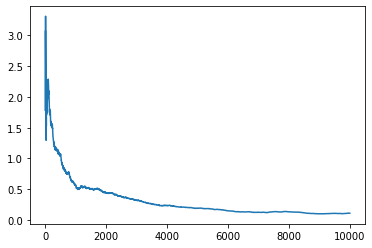

In [9]:
print("Here are reward and regret for the case without ad qualities, with only ads in first position")
clairvoyant_no_qualities = expected_values_no_qualities[index_no_qualities]
regret_no_qualities = [expected_values_no_qualities[index_no_qualities] - x for x in plotting_no_qualities]
plt.figure(0)
plt.plot(plotting_no_qualities, 'y')
plt.axhline(y=expected_values_no_qualities[index_no_qualities], color='r', linestyle='-')
print(index_no_qualities)
plt.figure(1)
plt.plot(regret_no_qualities) 

Here are reward and regret for the case without ad qualities, with all ads
14


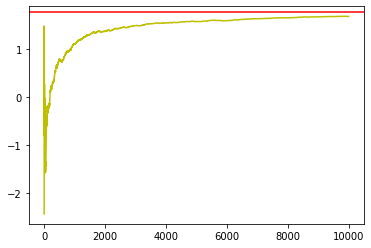

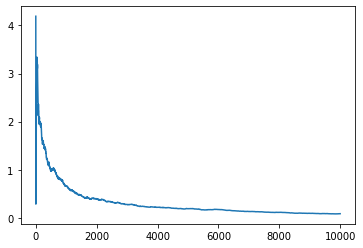

In [10]:
print("Here are reward and regret for the case without ad qualities, with all ads")
clairvoyant_no_qualities2 = expected_values_no_qualities2[index_no_qualities2]
regret_no_qualities2 = [expected_values_no_qualities2[index_no_qualities2] - x for x in plotting_no_qualities2]
plt.figure(2)
plt.plot(plotting_no_qualities2, 'y')
plt.axhline(y=expected_values_no_qualities2[index_no_qualities2], color='r', linestyle='-')
print(index_no_qualities2)
plt.figure(3)
plt.plot(regret_no_qualities2) 

Here are reward and regret for the case without anything, with only ads in first position
1


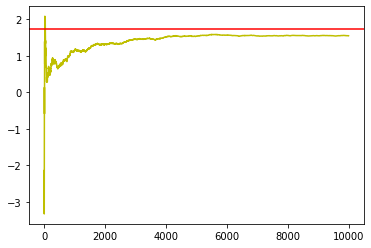

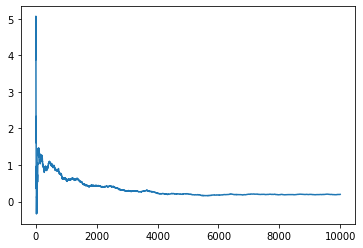

In [11]:
print("Here are reward and regret for the case without anything, with only ads in first position")
clairvoyant = expected_values[index]
regret = [expected_values[index] - x for x in plotting]
plt.figure(4)
plt.plot(plotting, 'y')
plt.axhline(y=expected_values[index], color='r', linestyle='-')
print(index)
plt.figure(5)
plt.plot(regret) 

Here are reward and regret for the case without anything, with all ads
14


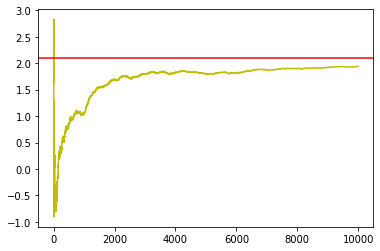

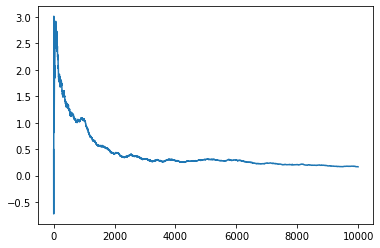

In [12]:
print("Here are reward and regret for the case without anything, with all ads")
clairvoyant2 = expected_values2[index2]
regret2 = [expected_values2[index2] - x for x in plotting2]
plt.figure(6)
plt.plot(plotting2, 'y')
plt.axhline(y=expected_values2[index2], color='r', linestyle='-')
print(index2)
plt.figure(7)
plt.plot(regret2) 